In [2]:
import pandas as pd
from pandas import *
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
trainDf = pd.read_csv('C:\\Users\\HP\Desktop\\PHD Hackathon\\Data Science\\PhD_Train_Data\\Train.csv', na_values=[' '])
trainDf.head(10)

,Year,Month,ProductCategory,Sales(In ThousandDollars)
0,2009,1,WomenClothing,1755.0
1,2009,1,MenClothing,524.0
2,2009,1,OtherClothing,936.0
3,2009,2,WomenClothing,1729.0
4,2009,2,MenClothing,496.0
5,2009,2,OtherClothing,859.0
6,2009,3,WomenClothing,2256.0
7,2009,3,MenClothing,542.0
8,2009,3,OtherClothing,921.0
9,2009,4,WomenClothing,2662.0


In [4]:
trainDf.isnull().sum()

Year                          0
Month                         0
ProductCategory               0
Sales(In ThousandDollars)    13
dtype: int64

In [34]:
sales_df = trainDf.copy()
sales_df.head()

,Year,Month,ProductCategory,Sales(In ThousandDollars)
0,2009,1,WomenClothing,1755.0
1,2009,1,MenClothing,524.0
2,2009,1,OtherClothing,936.0
3,2009,2,WomenClothing,1729.0
4,2009,2,MenClothing,496.0


In [35]:
## Create a Date Index for Sales Data Frame which can be used as key to merge the Data Frames  
sales_df['Date'] = sales_df.Year.astype(str).str.cat(sales_df.Month.astype(str), sep='-')
sales_df['Date'] = pd.to_datetime(sales_df.Date.astype(str) + "-1")
sales_df.set_index('Date', inplace = True)
sales_df.drop(["Year","Month"],axis =1, inplace=True)

In [39]:
sales_df = sales_df.reset_index()
sales_df.head()

,Date,ProductCategory,Sales(In ThousandDollars)
0,2009-01-01,WomenClothing,1755.0
1,2009-01-01,MenClothing,524.0
2,2009-01-01,OtherClothing,936.0
3,2009-02-01,WomenClothing,1729.0
4,2009-02-01,MenClothing,496.0


In [40]:
sales_df['Sales(In ThousandDollars)'] = sales_df.groupby('ProductCategory')['Sales(In ThousandDollars)'].apply(lambda x: x.fillna(x.mean()))
#sales_df['Sales(In ThousandDollars)']  = sales_df['Sales(In ThousandDollars)'].fillna(sales_df['Sales(In ThousandDollars)'].mean())

In [41]:
sales_df.isnull().sum()

Date                         0
ProductCategory              0
Sales(In ThousandDollars)    0
dtype: int64

In [22]:
train_pivoted = pivot_table(trainDf, index = ['Year', 'Month'], values = ['Sales(In ThousandDollars)'], columns = ['ProductCategory'])
train_pivoted.head()

Sales(In ThousandDollars)                            
ProductCategory               MenClothing OtherClothing WomenClothing
Year Month                                                           
2009 1                              524.0         936.0        1755.0
     2                              496.0         859.0        1729.0
     3                              542.0         921.0        2256.0
     4                              669.0         914.0        2662.0
     5                              650.0         989.0        2732.0

In [23]:
train_pivoted.shape

(84, 3)

In [24]:
train_pivoted.columns = ['MenClothing_Sales', 'OtherClothing_Sales', 'WomenClothing_Sales']
train_pivoted.head()

MenClothing_Sales  OtherClothing_Sales  WomenClothing_Sales
Year Month                                                             
2009 1                  524.0                936.0               1755.0
     2                  496.0                859.0               1729.0
     3                  542.0                921.0               2256.0
     4                  669.0                914.0               2662.0
     5                  650.0                989.0               2732.0

In [26]:
train_pivoted.describe()

,MenClothing_Sales,OtherClothing_Sales,WomenClothing_Sales
count,80.000000,79.000000,80.000000
mean,678.950000,1143.506329,3409.812500
std,137.027014,216.774423,842.614528
min,471.000000,819.000000,1729.000000
25%,595.250000,976.000000,2805.250000
50%,665.000000,1136.000000,3350.000000
75%,713.000000,1261.000000,3897.500000
max,1085.000000,1967.000000,5874.000000


In [27]:
train_pivoted.isnull().sum()

MenClothing_Sales      4
OtherClothing_Sales    5
WomenClothing_Sales    4
dtype: int64

In [32]:
train_pivoted['Sales(In ThousandDollars)'] = train_pivoted.sum(axis=1)
train_pivoted = train_pivoted.reset_index()
train_pivoted.head()

,index,Year,Month,MenClothing_Sales,OtherClothing_Sales,WomenClothing_Sales,Sales(In ThousandDollars)
0,0,2009,1,524.0,936.0,1755.0,8440.0
1,1,2009,2,496.0,859.0,1729.0,8179.0
2,2,2009,3,542.0,921.0,2256.0,9450.0
3,3,2009,4,669.0,914.0,2662.0,10503.0
4,4,2009,5,650.0,989.0,2732.0,10756.0


## Distribution Plots

### Distribution Sales(In ThousandDollars) 

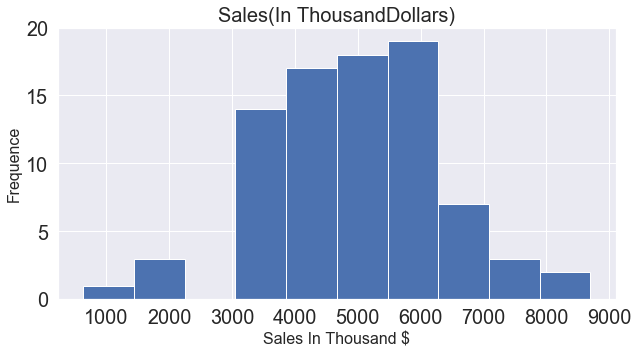

In [29]:
plt.subplots(figsize = (10, 5))
plt.hist(train_pivoted['Sales(In ThousandDollars)'])
plt.xlabel('Sales In Thousand $', fontdict={'size':16})
plt.ylabel('Frequence',  fontdict={'size':16})
plt.yticks(np.arange(0, 25, 5))
plt.title('Sales(In ThousandDollars)',  fontdict={'size':20})
plt.show()

C:\Users\HP\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\HP\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


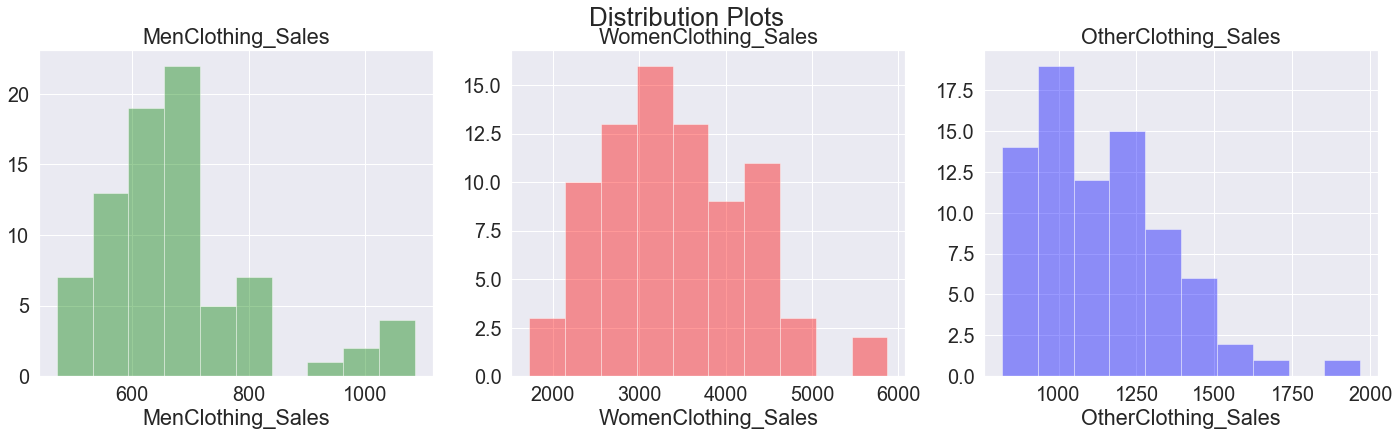

In [30]:
f, axes = plt.subplots(figsize=(24,6), nrows=1, ncols=3)

sns.distplot(train_pivoted.MenClothing_Sales, ax = axes[0], kde = False, color = 'green', bins=10).set_title('MenClothing_Sales')
sns.distplot(train_pivoted.WomenClothing_Sales, ax = axes[1], kde = False, color = 'red', bins=10).set_title("WomenClothing_Sales") 
sns.distplot(train_pivoted.OtherClothing_Sales, ax = axes[2], kde = False, color = 'blue', bins=10).set_title("OtherClothing_Sales") 

f.suptitle('Distribution Plots')
sns.set(font_scale = 1.8)
plt.show()

### Year vs Sales Plot

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


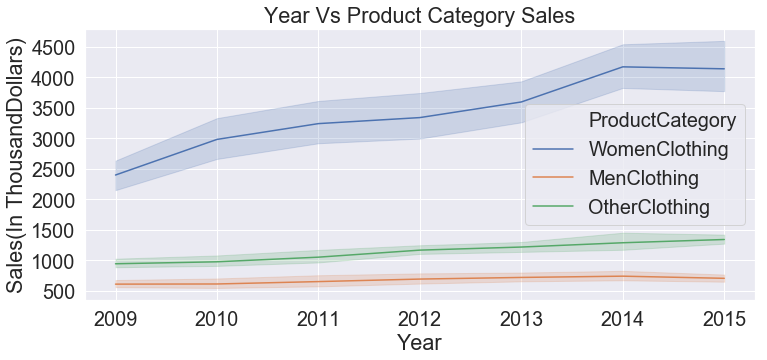

In [42]:
plt.subplots(figsize = (12, 5))
sns.lineplot(x="Year", y="Sales(In ThousandDollars)", hue="ProductCategory", data = trainDf)
plt.yticks(np.arange(500,5000, 500))
plt.title('Year Vs Product Category Sales')
plt.show()

In [51]:
data = pd.read_csv('C:\\Users\\HP\Desktop\\PHD Hackathon\\Data Science\\trainingDataFull.csv', encoding='latin1')
data.head()

,Year,Month,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity_high,Humidity_avg,...,Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports,MenClothing_Sales,OtherClothing_Sales,WomenClothing_Sales,Sales(In ThousandDollars)
0,2009,1,0.741935,-2.096774,-5.322581,-6.096774,-9.903226,-14.000000,71.774194,57.354839,...,9.296,7.559,799,12.589,4.17,11.550,524.0,936.0,1755.0,3215.0
1,2009,10,16.258065,12.870968,9.354839,9.838710,7.032258,3.903226,85.903226,69.354839,...,8.989,7.586,799,12.631,3.37,10.000,610.0,914.0,2579.0,4103.0
2,2009,11,13.733333,10.800000,7.566667,7.000000,4.166667,1.433333,80.466667,66.600000,...,8.989,7.586,767,12.129,3.37,9.950,620.0,955.0,2521.0,4096.0
3,2009,12,5.451613,2.354839,-1.032258,-0.935484,-4.677419,-8.709677,77.612903,61.741935,...,8.989,7.586,774,12.225,3.37,10.425,930.0,1351.0,3390.0,5671.0
4,2009,2,6.964286,2.785714,-1.642857,-2.464286,-6.392857,-10.571429,69.535714,54.000000,...,9.296,7.559,799,12.589,3.87,11.100,496.0,859.0,1729.0,3084.0


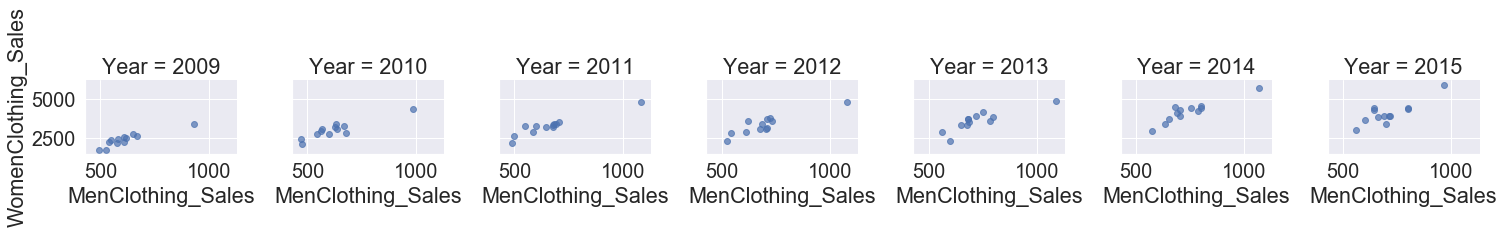

In [52]:
g = sns.FacetGrid(data, col="Year")
g.map(plt.scatter, "MenClothing_Sales", "WomenClothing_Sales", alpha=.7)
g.add_legend()